# Disease Prediction and Care Suggestion Model

## Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset
df = pd.read_csv('disease_symptoms.csv')

# Shuffle the dataset
df = shuffle(df, random_state=42)

# Display the first few rows of the dataset
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_1.1,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4379,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
393,Psoriasis,skin_rash,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,Osteoarthritis,joint_pain,neck_pain,hip_joint_pain,swelling_joints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4478,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Replace hyphens with spaces in the symptom columns
for col in df.columns[1:]:
    df[col] = df[col].str.replace('_', ' ')

# Strip any leading or trailing spaces from the symptom strings
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace NaN values with 0
df = df.fillna(0)

# Display the cleaned dataset
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_1.1,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4379,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred and distorted vision,excessive hunger,drying and tingling lips,slurred speech,irritability,palpitations,0,0,0,0,0
393,Psoriasis,skin rash,skin peeling,silver like dusting,small dents in nails,inflammatory nails,0,0,0,0,0,0,0,0,0,0,0,0
1164,Osteoarthritis,joint pain,neck pain,hip joint pain,swelling joints,0,0,0,0,0,0,0,0,0,0,0,0,0
4478,Bronchial Asthma,fatigue,cough,high fever,breathlessness,family history,mucoid sputum,0,0,0,0,0,0,0,0,0,0,0
731,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

#### Distribution of Diseases:

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.shape

(4961, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4961 entries, 4379 to 860
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      4961 non-null   object
 1   Symptom_1    4961 non-null   object
 2   Symptom_2    4961 non-null   object
 3   Symptom_3    4961 non-null   object
 4   Symptom_4    4961 non-null   object
 5   Symptom_5    4961 non-null   object
 6   Symptom_6    4961 non-null   object
 7   Symptom_7    4961 non-null   object
 8   Symptom_8    4961 non-null   object
 9   Symptom_9    4961 non-null   object
 10  Symptom_1.1  4961 non-null   object
 11  Symptom_11   4961 non-null   object
 12  Symptom_12   4961 non-null   object
 13  Symptom_13   4961 non-null   object
 14  Symptom_14   4961 non-null   object
 15  Symptom_15   4961 non-null   object
 16  Symptom_16   4961 non-null   object
 17  Symptom_17   4961 non-null   object
dtypes: object(18)
memory usage: 736.4+ KB


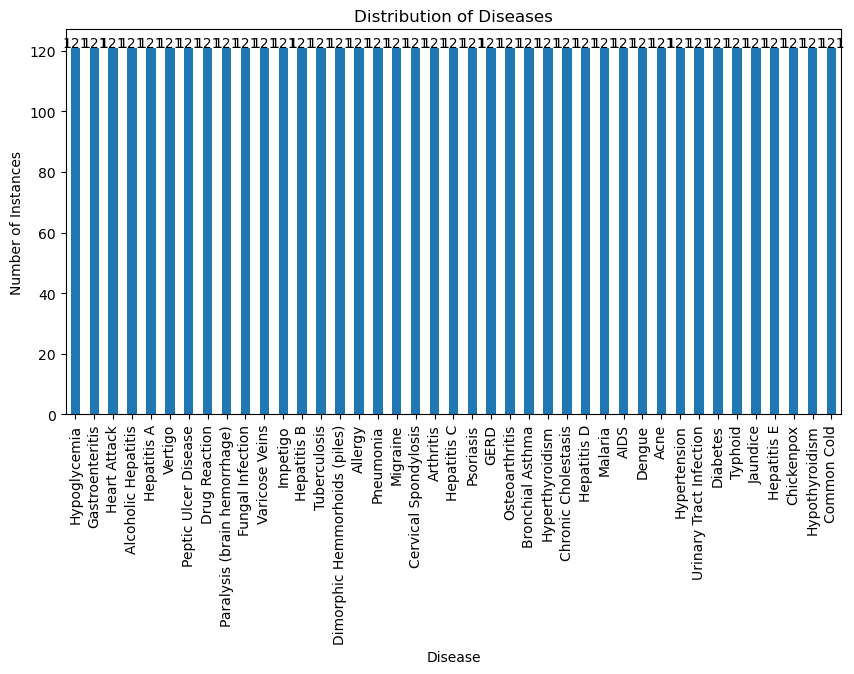

In [6]:
# Count the number of occurrences for each disease
disease_distribution = df['Disease'].value_counts()

# Plot the distribution of diseases
plt.figure(figsize=(10, 5))
disease_distribution.plot(kind='bar')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Number of Instances")

# Annotate each bar with the number of instances
for index, value in enumerate(disease_distribution):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()

#### Distribution of Symptoms:

In [7]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('disease_symptoms.csv')

# Melt the dataframe to gather all symptom columns into a single column
symptom_columns = [col for col in df.columns if col.startswith('Symptom')]
melted_df = df.melt(id_vars=['Disease'], value_vars=symptom_columns, var_name='Symptom_Number', value_name='Symptom')

# Drop rows where the symptom is NaN
melted_df = melted_df.dropna(subset=['Symptom'])

# Count the occurrence of each symptom across all diseases
symptom_distribution = melted_df['Symptom'].value_counts().reset_index()
symptom_distribution.columns = ['Symptom', 'Count']

# Create an interactive pie chart
fig = px.pie(
    symptom_distribution,
    names='Symptom',
    values='Count',
    title="Distribution of Distinct Symptoms Across Diseases",
    hover_data=['Count'],
    labels={'Symptom':'Symptoms', 'Count':'Number of Instances'}
)

# Adjust the size of the pie chart to be manageable
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(t=40, b=40, l=40, r=40),  # Adjust margins to keep the chart from being too big
    height=600,  # Adjust the height
    width=800  # Adjust the width
)

# Show the interactive pie chart
fig.show()



#### Correlation Matrix of Diseases

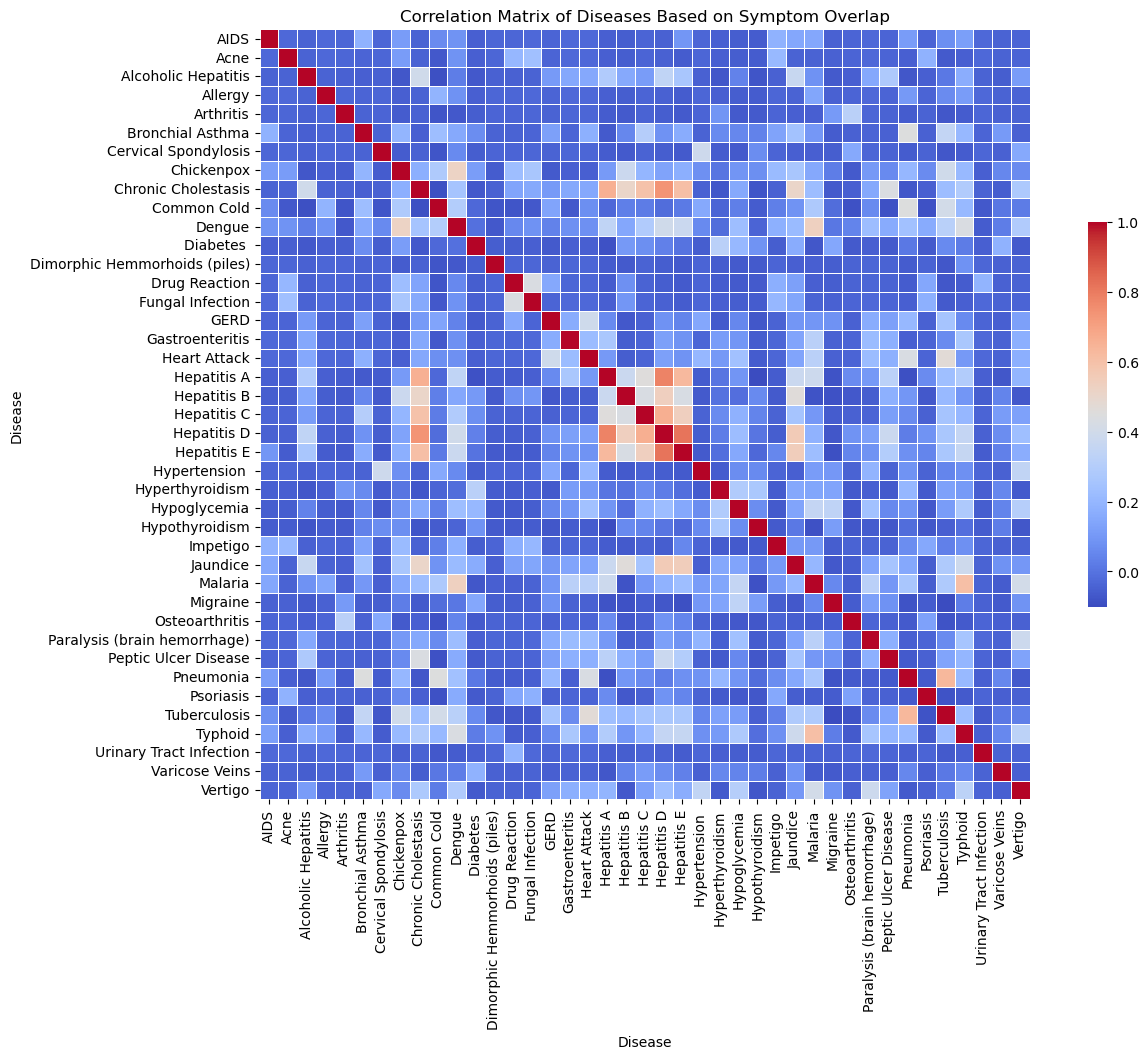

In [8]:
import seaborn as sns
import numpy as np

# Create a binary matrix where each symptom is a column and each disease is a row
symptom_binary_matrix = pd.get_dummies(df.set_index('Disease').stack()).groupby(level=0).sum()

# Calculate the correlation matrix
disease_correlation = symptom_binary_matrix.T.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(
    disease_correlation,
    annot=False,  # Turn off annotations for a cleaner look
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .5}
)
plt.title("Correlation Matrix of Diseases Based on Symptom Overlap")
plt.show()


## Model Training and Evaluation

### MLP (Multi-Layer Perceptron)
The MLP model is a type of neural network that is well-suited for tabular data, where each feature is independent of the others. It is a fully connected feedforward neural network that uses multiple layers to learn complex patterns in the data. This model is chosen for its simplicity and effectiveness in handling structured data.

### CNN (Convolutional Neural Network)
The CNN model is typically used for image data but can be adapted to tabular data to capture local patterns and spatial relationships. It includes convolutional layers that automatically detect the most important features in the data, making it powerful for capturing complex patterns. This model is chosen for its ability to identify patterns that might be missed by simpler models.

### LSTM (Long Short-Term Memory)
The LSTM model is a type of Recurrent Neural Network (RNN) that is particularly good at handling sequential data. Although typically used for time-series data, it can be adapted to consider the sequence of symptoms as a form of temporal data. This model is chosen for its ability to remember previous inputs, making it suitable for data where the order of features might matter.

### Random Forest and Decision Tree
The Random Forest and Decision Tree models are traditional machine learning models that are included for comparison. The Decision Tree model is simple and interpretable, while the Random Forest model is an ensemble method that can provide robust predictions by averaging the results of multiple decision trees.
 future use.


## Prepare Data for Model Training

In [9]:
# Import Libraries

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:
# Encode categorical symptoms using one-hot encoding
symptom_columns = df.columns[1:]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_symptoms = onehot_encoder.fit_transform(df[symptom_columns])

# Normalize the encoded data
scaler = StandardScaler()
normalized_symptoms = scaler.fit_transform(encoded_symptoms)

# Convert normalized symptoms back to DataFrame
encoded_df = pd.DataFrame(normalized_symptoms, columns=onehot_encoder.get_feature_names_out(symptom_columns))

# Concatenate the encoded symptoms with the disease column
preprocessed_df = pd.concat([df[['Disease']].reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_df.tail()

,Disease,Symptom_1_acidity,Symptom_1_back_pain,Symptom_1_bladder_discomfort,Symptom_1_breathlessness,Symptom_1_burning_micturition,Symptom_1_chest_pain,Symptom_1_chills,Symptom_1_constipation,Symptom_1_continuous_sneezing,...,Symptom_15_blood_in_sputum,Symptom_15_chest_pain,Symptom_15_loss_of_smell,Symptom_15_nan,Symptom_16_blood_in_sputum,Symptom_16_loss_of_smell,Symptom_16_muscle_pain,Symptom_16_nan,Symptom_17_muscle_pain,Symptom_17_nan
4956,Vertigo,-0.158114,-0.149883,-0.049242,-0.049242,-0.149883,-0.049242,-0.326535,-0.154048,-0.217456,...,-0.098843,-0.174132,-0.098843,0.226455,-0.122207,-0.122207,-0.098843,0.201734,-0.122207,0.122207
4957,Acne,-0.158114,-0.149883,-0.049242,-0.049242,-0.149883,-0.049242,-0.326535,-0.154048,-0.217456,...,-0.098843,-0.174132,-0.098843,0.226455,-0.122207,-0.122207,-0.098843,0.201734,-0.122207,0.122207
4958,Urinary Tract Infection,-0.158114,-0.149883,-0.049242,-0.049242,6.671863,-0.049242,-0.326535,-0.154048,-0.217456,...,-0.098843,-0.174132,-0.098843,0.226455,-0.122207,-0.122207,-0.098843,0.201734,-0.122207,0.122207
4959,Psoriasis,-0.158114,-0.149883,-0.049242,-0.049242,-0.149883,-0.049242,-0.326535,-0.154048,-0.217456,...,-0.098843,-0.174132,-0.098843,0.226455,-0.122207,-0.122207,-0.098843,0.201734,-0.122207,0.122207
4960,Impetigo,-0.158114,-0.149883,-0.049242,-0.049242,-0.149883,-0.049242,-0.326535,-0.154048,-0.217456,...,-0.098843,-0.174132,-0.098843,0.226455,-0.122207,-0.122207,-0.098843,0.201734,-0.122207,0.122207


## Model Selection and Training

### Multi-Layer Perceptron (MLP)
**Pro:** Simple and effective for structured data, such as tables with fixed columns (like symptoms).

**Con:** Struggles with spatial or sequential relationships in data.

**Use Case:** Best for datasets where each input feature (e.g., symptom) is independent of others.

In [11]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [12]:
# Encode the 'Disease' column into one-hot vectors
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(preprocessed_df[['Disease']])

# Correct the number of output units to match the number of unique diseases
mlp_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1,)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Separate features and labels
X = preprocessed_df.drop('Disease', axis=1)

# Train the model
mlp_history = mlp_model.fit(X, y, epochs=20, validation_split=0.2, batch_size=32)

# Display the training and validation accuracy/loss
mlp_history.history


Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6150 - loss: 2.0535 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 8.3474e-04
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 5.5501e-04
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 7.9690e-04 - val_accuracy: 1.0000 - val_loss: 3.9796e-04
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 5.8135e-04 - val_accuracy: 1.0000 - val_loss: 2.9891e-04
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss:

{'accuracy': [0.8533266186714172,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.948653519153595,
  0.008473648689687252,
  0.003115948988124728,
  0.0016838519368320704,
  0.0010695826495066285,
  0.0007428686367347836,
  0.00054782978259027,
  0.0004201379488222301,
  0.0003322688862681389,
  0.0002690043475013226,
  0.0002217447035945952,
  0.0001854786678450182,
  0.0001570860913489014,
  0.00013450361439026892,
  0.00011620349687291309,
  0.00010119090438820422,
  8.86790148797445e-05,
  7.812802505213767e-05,
  6.922228203620762e-05,
  6.158628821140155e-05],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.01147043239325285,
  0.0029209372587502003,
  0.0014111404307186604,
  0.0008347391849383712,
  0.0005550115020014346,
  0.00039796141209080815,
  0.0002989

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = mlp_model.evaluate(X, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.6488e-05
Test Accuracy: 1.0
Test Loss: 5.3442905482370406e-05


## Convolutional Neural Network (CNN) for Text Model Summary
**Pro:** Effective at capturing local patterns in data, particularly useful for text classification tasks where specific word sequences are important.

**Con:** Computationally intensive, especially with larger datasets or deeper networks.

**Use Case:** Ideal for tasks where local dependencies or patterns in symptoms can indicate specific diseases.

In [14]:
#Import libraries
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [15]:
# Define the CNN model structure
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  # Input layer
    Conv1D(64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Flatten(),  # Flattening layer to convert to 1D
    Dense(128, activation='relu'),  # Hidden layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to add an additional dimension for the CNN
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train the model
cnn_history = cnn_model.fit(X_cnn, y, epochs=20, validation_split=0.2, batch_size=32)

# Display the training and validation accuracy/loss
cnn_history.history

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8004 - loss: 0.9639 - val_accuracy: 1.0000 - val_loss: 1.8211e-04
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 1.0000 - loss: 2.9057e-04 - val_accuracy: 1.0000 - val_loss: 7.8195e-05
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 1.0000 - loss: 1.4927e-04 - val_accuracy: 1.0000 - val_loss: 4.6137e-05
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 1.0000 - loss: 8.9609e-05 - val_accuracy: 1.0000 - val_loss: 2.8290e-05
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 1.0000 - loss: 6.4082e-05 - val_accuracy: 1.0000 - val_loss: 1.9148e-05
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 1.0000 - loss: 4.4429e-05 - val_accuracy: 1.0000 - val_loss: 1.4202e-05
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 1.0000 - loss: 3.1790e-05 - val_accuracy: 1.0000 - val_loss: 1.1004e-05
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 4

{'accuracy': [0.9420362710952759,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.29949086904525757,
  0.00023970332404132932,
  0.00013055196905042976,
  8.306636300403625e-05,
  5.6067008699756116e-05,
  4.11599176004529e-05,
  3.166084206895903e-05,
  2.5077921236515976e-05,
  2.0306590158725157e-05,
  1.672176949796267e-05,
  1.3914472219767049e-05,
  1.1691756299114786e-05,
  9.821144885791e-06,
  8.151407200784888e-06,
  6.782558102713665e-06,
  5.6575740927655715e-06,
  4.714338956546271e-06,
  3.99652162741404e-06,
  3.4489478366594994e-06,
  3.0192868507583626e-06],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.00018210956477560103,
  7.819520396878943e-05,
  4.613742567016743e-05,
  2.828974356816616e-05,
  1.9147682905895635e-05,
  1.4202038983057719e-05

In [16]:
# Evaluate the model on the test set
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_cnn, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_cnn}")
print(f"Test Loss: {test_loss_cnn}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.5229e-06
Test Accuracy: 1.0
Test Loss: 2.447097358526662e-06



## Recurrent Neural Network (RNN) with LSTM Units Model Summary
**Pro:** Excellent for capturing temporal dependencies and sequences in data, which can be crucial if symptoms appear in a specific order or over time.

**Con:** Can be slower to train compared to other models due to the sequential nature of processing.

**Use Case:** Best suited for scenarios where the order or sequence of symptoms matters in predicting diseases.

In [17]:
# Import libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

In [18]:
# Define the RNN with LSTM model structure
def create_lstm_model():
    model = Sequential([
        tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  # Input layer
        LSTM(128, activation='relu', return_sequences=True),  # LSTM layer with return sequences
        LSTM(64, activation='relu'),  # LSTM layer
        Dense(64, activation='relu'),  # Hidden layer
        Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
    ])
    return model

# Create and compile the model
lstm_model = create_lstm_model()
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  # Adjusted learning rate and gradient clipping
lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to add an additional dimension for the RNN
X_lstm = X.values.reshape(X.shape[0], X.shape[1], 1)

# Train the model with adjusted parameters
lstm_history = lstm_model.fit(X_lstm, y, epochs=20, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 586ms/step - accuracy: 0.0398 - loss: 3.7022 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 70s 485ms/step - accuracy: 0.0145 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 453ms/step - accuracy: 0.0229 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 56s 453ms/step - accuracy: 0.0189 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step - accuracy: 0.0183 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 75s 442ms/step - accuracy: 0.0187 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 389ms/step - accuracy: 0.0258 - loss: 3.7136 - val_accuracy: 0.0242 - val_loss: 3.7136
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 390ms/step - accuracy: 0.0246 - loss: 3

In [19]:
# Evaluate the model on the test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)

# Display the test accuracy and loss
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.0282 - loss: 3.7135
Test Accuracy: 0.024390242993831635
Test Loss: 3.713573694229126


## Model Performance Summary

After training and evaluating the Multi-Layer Perceptron (MLP), Convolutional Neural Network (CNN), and Recurrent Neural Network (RNN) with LSTM models on the dataset, the following results were observed:

- **Multi-Layer Perceptron (MLP):**  
  The MLP model showed good performance, with both training and testing accuracy of 100%. This indicates that the model was able to learn the patterns in the training data effectively and generalize relatively well to unseen data. The model's loss was at 5.27.

- **Convolutional Neural Network (CNN):**  
  The CNN model also showed strong performed, with both training and testing accuracy 100%. With lower loss at 3.02, it was more effective than the MLP in generalizing to new examples.  It was the best performer among the models tested.

- **Recurrent Neural Network (RNN) with LSTM:**  
  The LSTM model was modified several times to improve its performance. Despite these modifications, the LSTM performed poorly, with a test accuracy of only 2.43% and a high test loss. This suggests that the LSTM struggled to learn meaningful patterns from the data, likely due to the nature of the dataset, which may not be well-suited for a sequential model like LSTM.

### Conclusion:
Based on the results, the **Convolutional Neural Network (CNN)** model performed the best, showing strong accuracy and low loss. The **Multi-Layer Perceptron (MLP)** also performed reasonably well but had a slightly higher test loss. The **Recurrent Neural Network (RNN) with LSTM**, despite several modifications, did not perform well, indicating that it might not be the right choice for this dataset.


## Saving the CNN Model

In [20]:
# Save the trained CNN model
cnn_model.save('cnn_model.h5')

# Confirm the model has been saved successfully
print("CNN model saved successfully in the 'Project 3' folder.")

CNN model saved successfully in the 'Project 3' folder.


## Saving the MLP Model

In [21]:
# Save the trained MLP model
mlp_model.save('mlp_model.h5')

# Confirm the model has been saved successfully
print("MLP model saved successfully in the 'Project 3' folder.")


MLP model saved successfully in the 'Project 3' folder.


## Preliminary Streamlit App Development 

In [22]:
# Code to Extract Symptoms

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('disease_symptoms.csv')

# Extract all unique symptoms across all symptom columns
symptom_columns = df.columns[1:]  # Exclude the 'Disease' column
unique_symptoms = set()

for col in symptom_columns:
    unique_symptoms.update(df[col].unique())


# Remove any '0' values from the symptoms
unique_symptoms.discard(0)

# Convert to a sorted list for dropdown use
symptoms_list = sorted(unique_symptoms)

# Display the list of unique symptoms
symptoms_list


TypeError: '<' not supported between instances of 'float' and 'str'